In [1]:
import pandas as pd

df = pd.read_csv("data/datasets2025/historical_metering_data_ES.csv", parse_dates=["DATETIME"])
df.set_index("DATETIME", inplace=True)

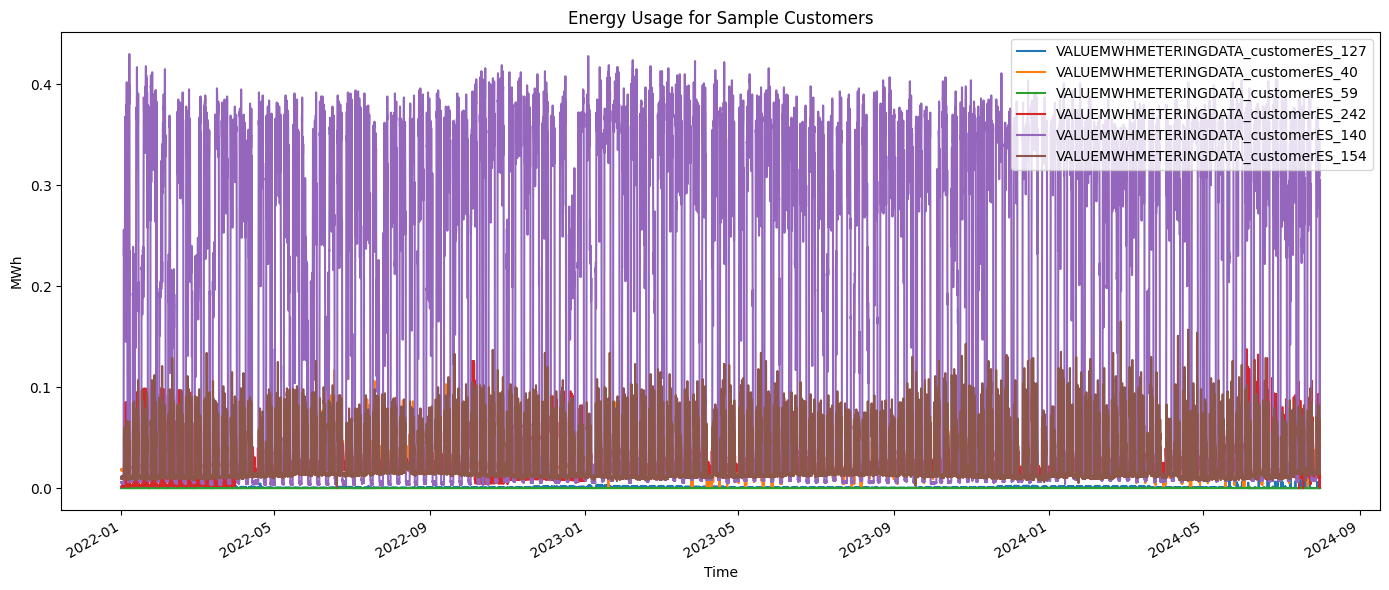

In [2]:
import matplotlib.pyplot as plt
import random

# Choose a few customer columns randomly
sample_columns = random.sample(list(df.columns), 6)

# Plot
df[sample_columns].plot(figsize=(14, 6))
plt.title("Energy Usage for Sample Customers")
plt.ylabel("MWh")
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


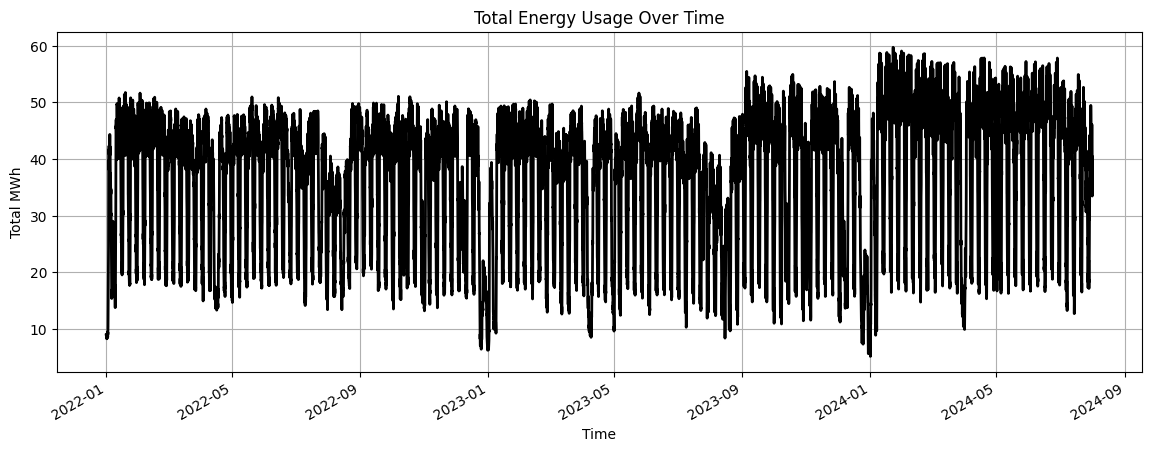

In [3]:
df["TOTAL_USAGE"] = df.sum(axis=1)
df["TOTAL_USAGE"].plot(figsize=(14, 5), color="black", lw=2)
plt.title("Total Energy Usage Over Time")
plt.ylabel("Total MWh")
plt.xlabel("Time")
plt.grid(True)
plt.show()


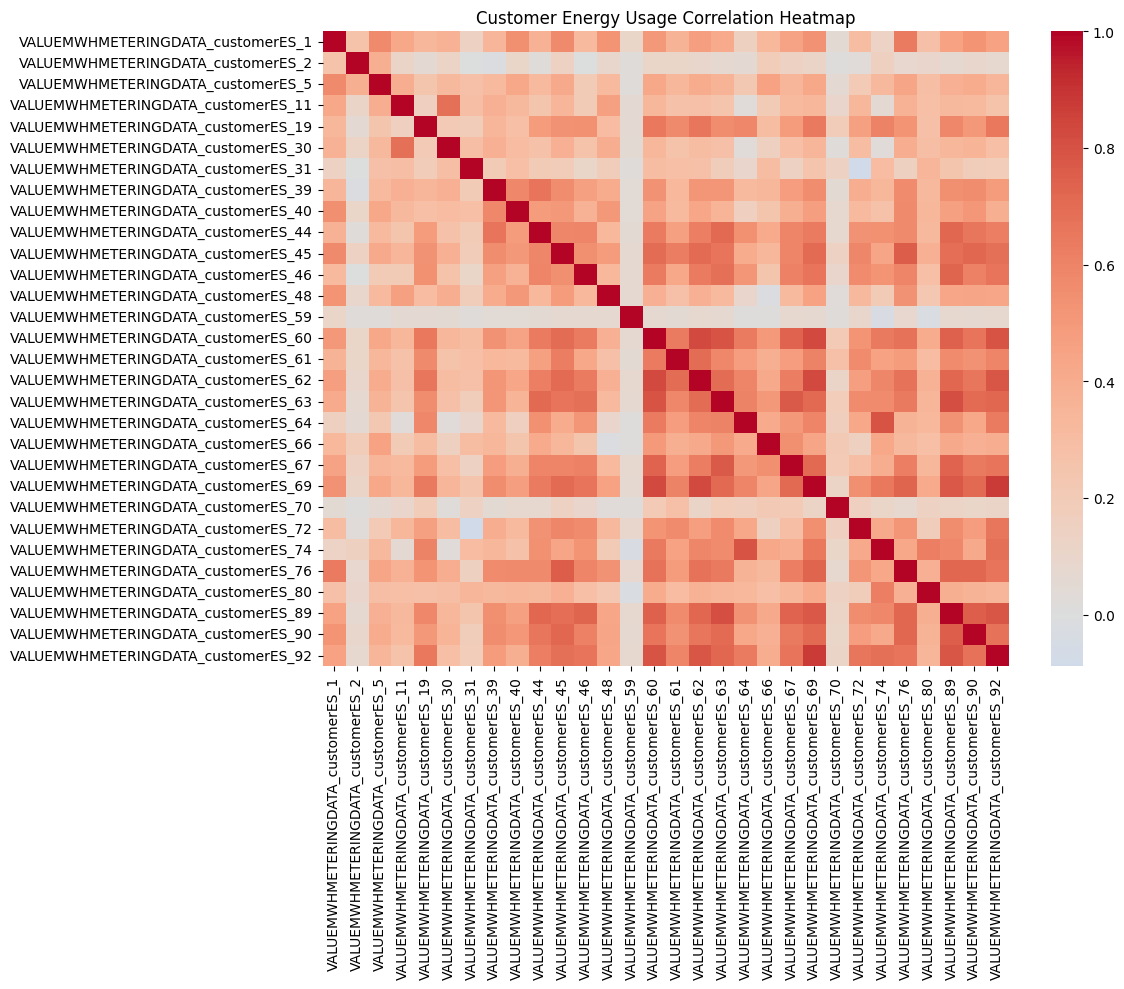

In [5]:
import seaborn as sns

# Compute correlation (optional: use subset to avoid overcrowding)
subset_df = df.iloc[:, :30]  # Just the first 30 columns for visualization
corr = subset_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Customer Energy Usage Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
df["hour"] = df.index.hour
hourly_avg = df.groupby("hour").mean()

# Plot average hourly usage for a few customers
hourly_avg[sample_columns].plot(figsize=(14, 6))
plt.title("Average Hourly Energy Usage")
plt.xlabel("Hour of Day")
plt.ylabel("Average MWh")
plt.grid(True)
plt.show()
